
# Part 1 – Power Law Transformation (Gamma Correction)

In [39]:
pip install opencv-python "numpy<2" matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

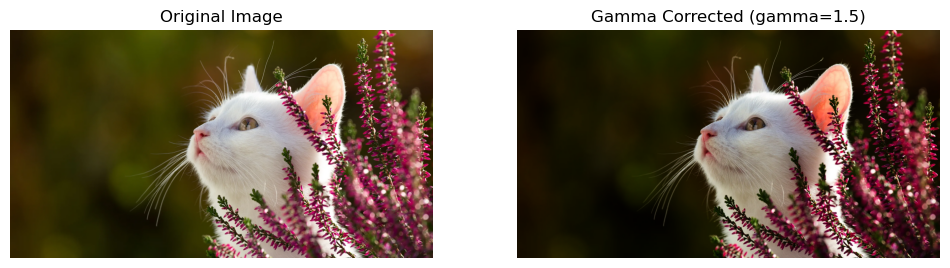

In [42]:
def gamma_correction(image, gamma):
    normalized = image / 255.0
    corrected = np.power(normalized, gamma)
    return np.uint8(corrected * 255)

img = cv2.imread('/Users/230104/Downloads/catjpeg.webp')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

corrected = gamma_correction(img_rgb, 1.5)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(corrected)
plt.title("Gamma Corrected (gamma=1.5)")
plt.axis('off')
plt.show()


### Challenge 1.2 – Gamma Curve Analysis


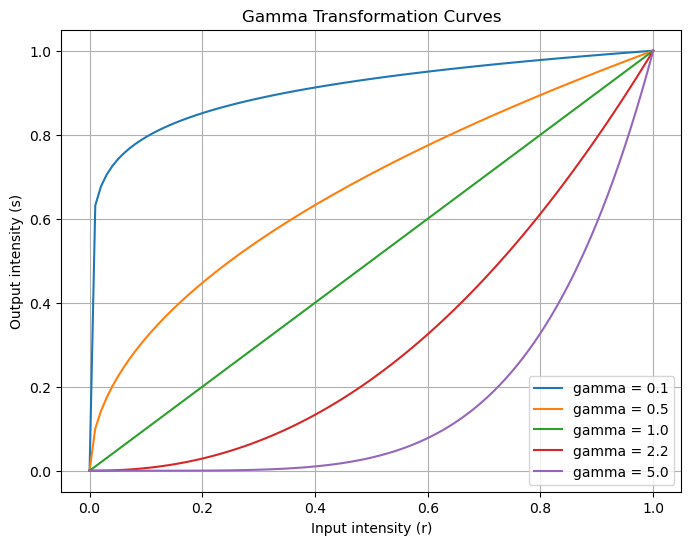

In [44]:
r = np.linspace(0, 1, 100)
gamma_values = [0.1, 0.5, 1.0, 2.2, 5.0]

plt.figure(figsize=(8, 6))
for g in gamma_values:
    s = np.power(r, g)
    plt.plot(r, s, label=f'gamma = {g}')

plt.title("Gamma Transformation Curves")
plt.xlabel("Input intensity (r)")
plt.ylabel("Output intensity (s)")
plt.legend()
plt.grid(True)
plt.show()


### Challenge 1.3 – Comparative Study

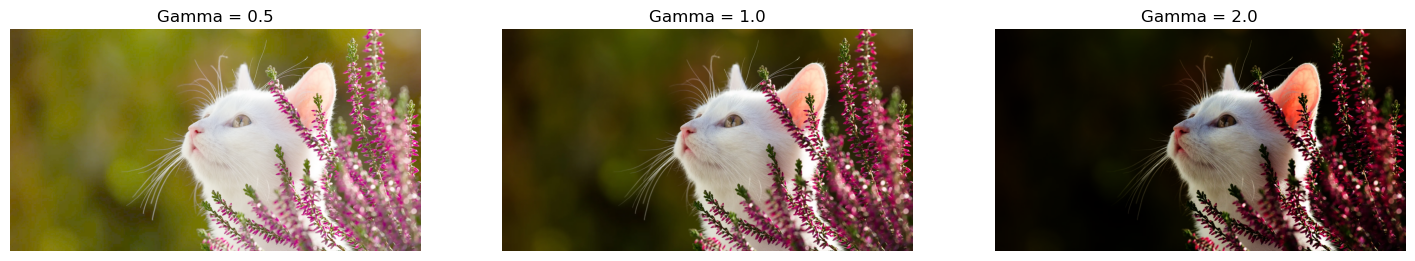

In [47]:
gammas_to_test = [0.5, 1.0, 2.0]

plt.figure(figsize=(18, 6))
for i, g in enumerate(gammas_to_test):
    res = gamma_correction(img_rgb, g)
    plt.subplot(1, 3, i + 1)
    plt.imshow(res)
    plt.title(f"Gamma = {g}")
    plt.axis('off')
plt.show()


# Part 2 – Basic Intensity Transformations

### Challenge 2.1 – Image Negative


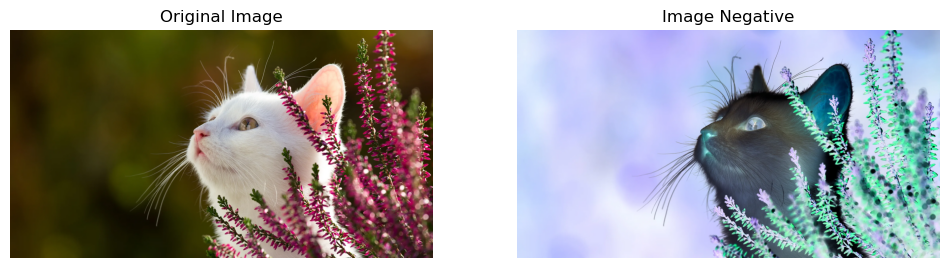

In [49]:
def image_negative(image):
    return 255 - image

neg = image_negative(img_rgb)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(neg)
plt.title("Image Negative")
plt.axis('off')
plt.show()


### Challenge 2.2 – Intensity Range Mapping



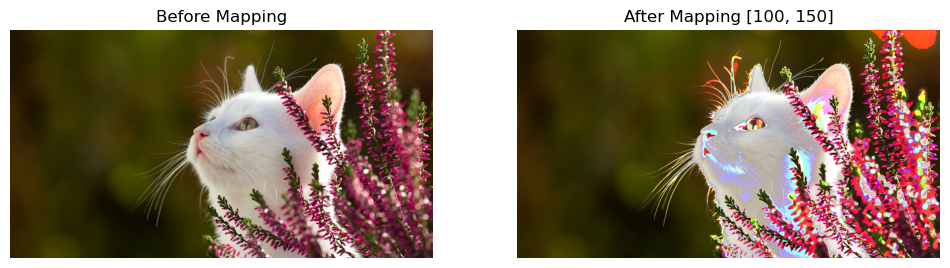

In [51]:
def intensity_range_mapping(image, A, B):
    result = image.copy()
    mask = (result >= A) & (result <= B)
    result[mask] = 255
    return result

mapped = intensity_range_mapping(img_rgb, 100, 150)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Before Mapping")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mapped)
plt.title("After Mapping [100, 150]")
plt.axis('off')
plt.show()


### Challenge 2.3 – Integrated Enhancement



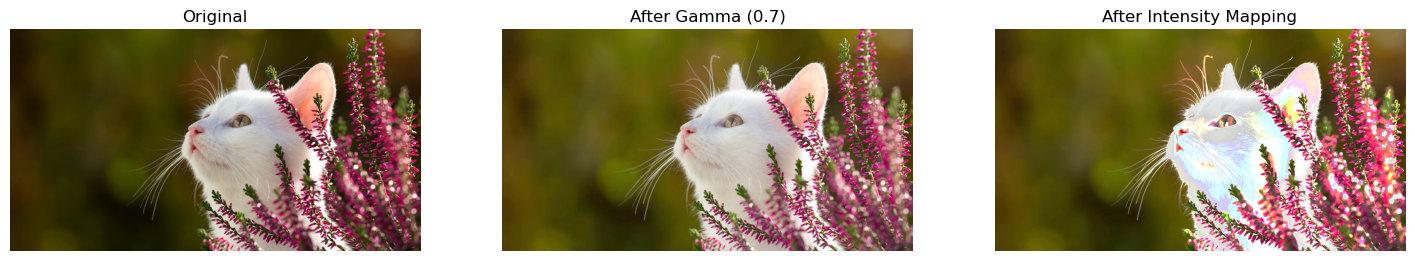

In [53]:
gamma_step = gamma_correction(img_rgb, 0.7)
final_step = intensity_range_mapping(gamma_step, 150, 200)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gamma_step)
plt.title("After Gamma (0.7)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(final_step)
plt.title("After Intensity Mapping")
plt.axis('off')
plt.show()



# Part 3 – Advanced Optimization Challenge

### Challenge 3.1 – Performance & Robustness


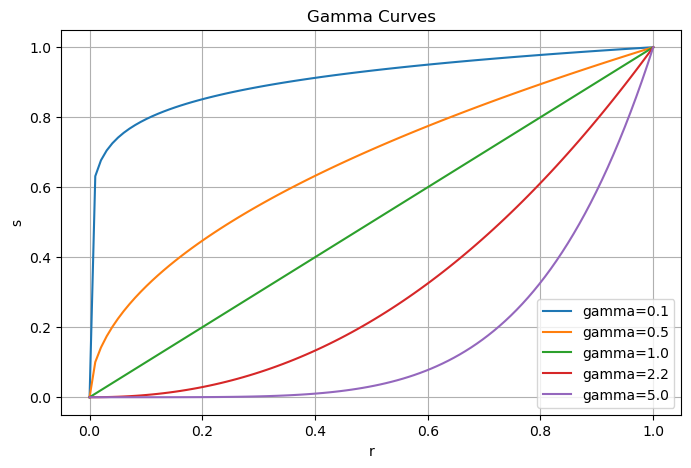

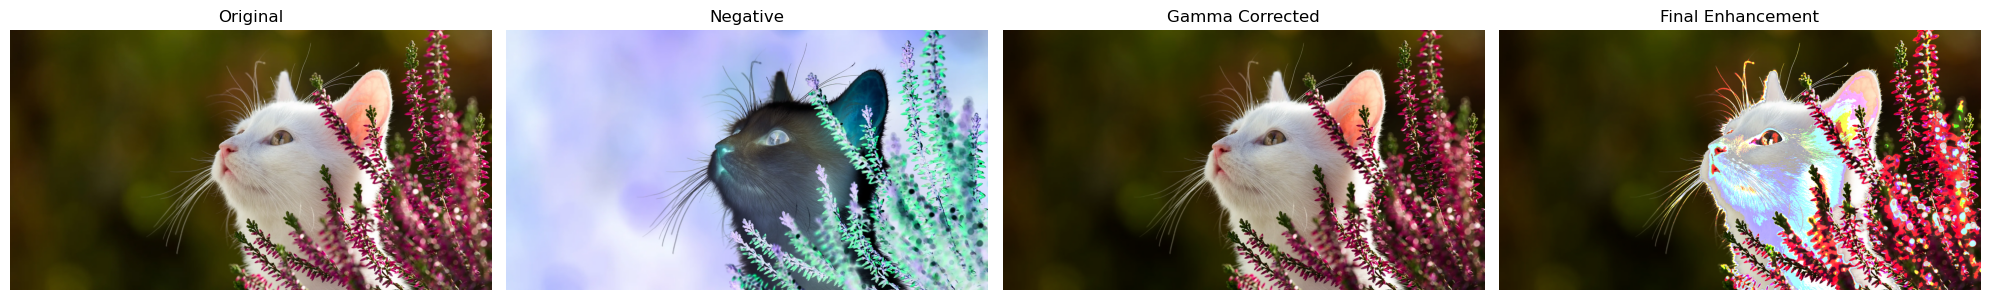

In [54]:
def optimized_processor(image_path, gamma=1.0, map_range=None):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError("Image path is invalid.")

    if len(img.shape) == 3:
        img_work = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_work = img

    lut = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    gamma_img = cv2.LUT(img_work, lut)

    negative_img = 255 - img_work

    enhanced_img = gamma_img.copy()
    if map_range:
        A, B = map_range
        enhanced_img[(enhanced_img >= A) & (enhanced_img <= B)] = 255

    r = np.linspace(0, 1, 100)
    plt.figure(figsize=(8, 5))
    for g in [0.1, 0.5, 1.0, 2.2, 5.0]:
        plt.plot(r, np.power(r, g), label=f'gamma={g}')
    plt.title("Gamma Curves")
    plt.xlabel("r")
    plt.ylabel("s")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(20, 5))
    titles = ['Original', 'Negative', 'Gamma Corrected', 'Final Enhancement']
    outputs = [img_work, negative_img, gamma_img, enhanced_img]
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(outputs[i], cmap='gray' if len(outputs[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

optimized_processor('/Users/230104/Downloads/catjpeg.webp', gamma=1.2, map_range=(100, 160))